# 4. Merging species counts tables into one counts table for all species

In [9]:
import os
import pandas as pd
import numpy as np
# requires dammit env
# source activate dammit
#from dammit.fileio.gff3 import GFF3Parser
%matplotlib inline
import pylab as plt
from matplotlib_venn import venn2

In [21]:
counts_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/tximport_counts_ensembl/"
counts_matrices = os.listdir(counts_dir)
print(counts_matrices)

['F_sciadicus_counts_ensembl.csv', 'F_rathbuni_counts_ensembl.csv', 'F_zebrinus_counts_ensembl.csv', 'F_grandis_counts_ensembl.csv', 'F_notatus_counts_ensembl.csv', 'F_notti_counts_ensembl.csv', 'F_parvapinis_counts_ensembl.csv', 'L_goodei_counts_ensembl.csv', 'F_olivaceous_counts_ensembl.csv', 'L_parva_counts_ensembl.csv', 'F_heteroclitusMDPP_counts_ensembl.csv', 'F_similis_counts_ensembl.csv', 'F_diaphanus_counts_ensembl.csv', 'F_chrysotus_counts_ensembl.csv', 'A_xenica_counts_ensembl.csv', 'F_catanatus_counts_ensembl.csv', 'F_heteroclitusMDPL_counts_ensembl.csv']


In [22]:
test = pd.read_csv(counts_dir + 'F_catanatus_counts_ensembl.csv',sep="\t")
test = test.rename(columns={'Unnamed: 0': 'Ensembl'})

In [23]:
test.head()

,Ensembl,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant
0,ENSFHEP00000000002,0.000,0.000,1.000,40.885,3.219,24.805,3.000
1,ENSFHEP00000000003,19.116,15.854,6.022,304.940,391.971,136.154,132.644
2,ENSFHEP00000000004,178468.275,292307.459,363649.185,142054.862,703788.356,619754.159,823950.009
3,ENSFHEP00000000005,59.828,102.121,73.000,868.000,267.801,233.001,208.858
4,ENSFHEP00000000006,0.000,0.000,0.000,3.000,1.000,2.000,5.000


19881


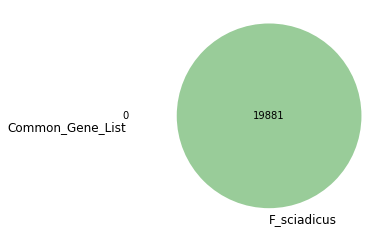

24903


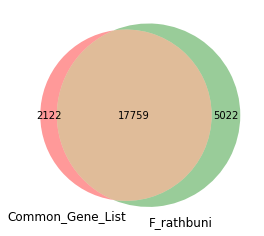

26184


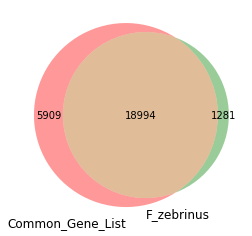

28334


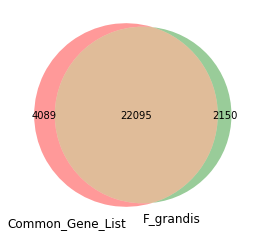

29064


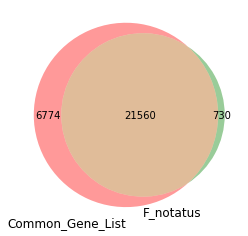

29321


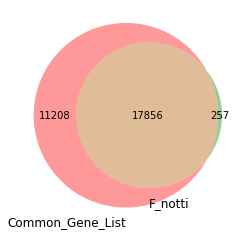

29689


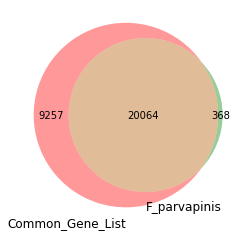

29995


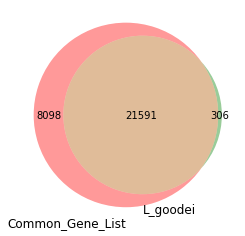

30234


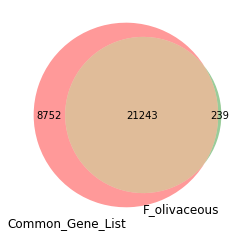

30483


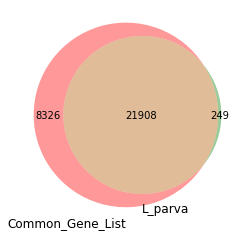

30836


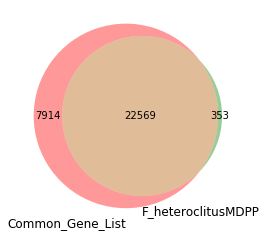

31013


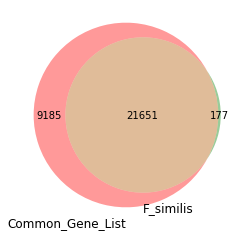

31119


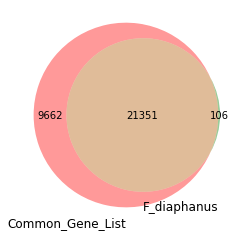

31252


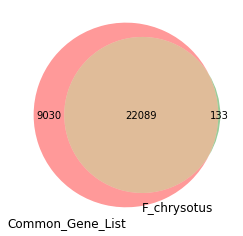

31367


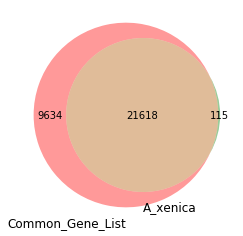

31475


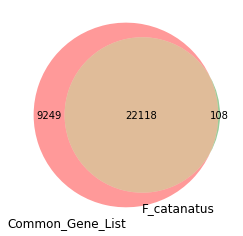

31590


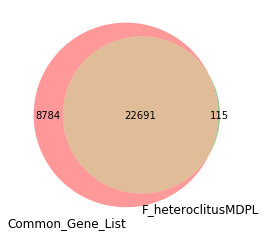

In [24]:
gene_list_common = []
# construct common gene list (union)
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Ensembl'})
        # if countsvalue is >5 in any column, then keep
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['Ensembl'].tolist()
        #species_genes = [item for sublist in species_genes for item in sublist]
        a = set(species_genes)
        b = set(gene_list_common)
        gene_list_common = list(a | b)
        print(len(gene_list_common))
        gene_list_common.extend(gene_list_common)
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()
# construct unique gene list ()

In [25]:
print(len(gene_list_common))
print(len(set(gene_list_common)))

63180
31590


19881


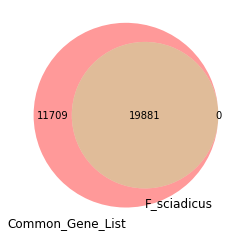

22781


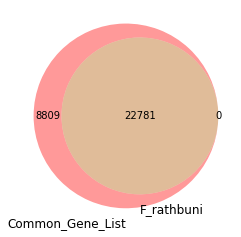

20275


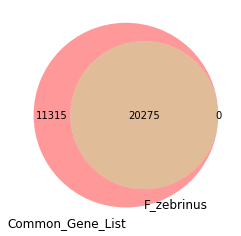

24245


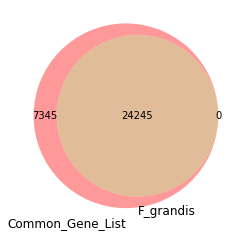

22290


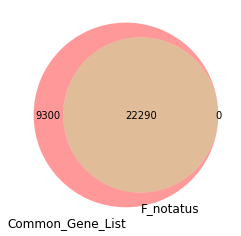

18113


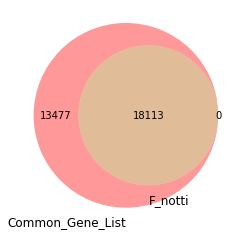

20432


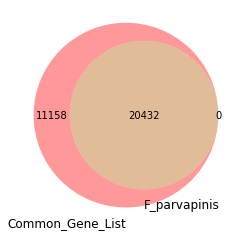

21897


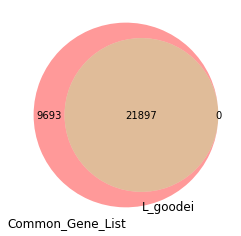

21482


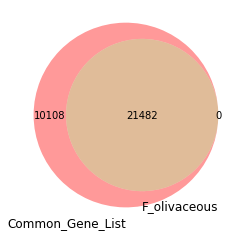

22157


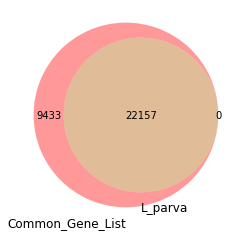

22922


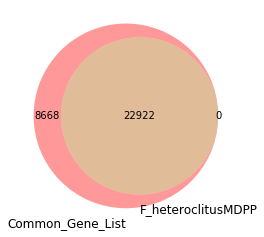

21828


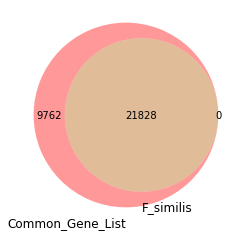

21457


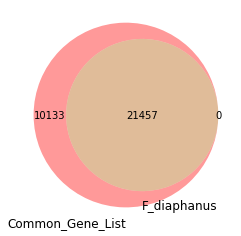

22222


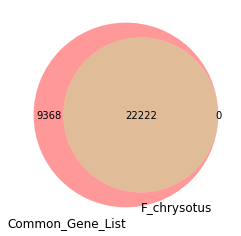

21733


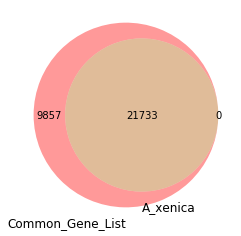

22226


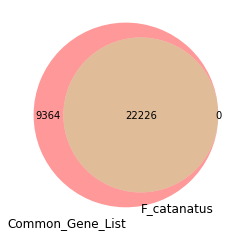

22806


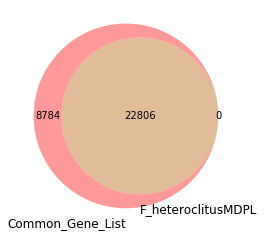

In [26]:
# only genes that are in common across all species
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Ensembl'})
        table_filt = table[(table.iloc[:,1:] > 5).any(1)]
        species_genes = table['Ensembl'].tolist()
        a = set(species_genes)
        b = set(gene_list_common)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [27]:
print(counts_matrices)
print(len(counts_matrices))

['F_sciadicus_counts_ensembl.csv', 'F_rathbuni_counts_ensembl.csv', 'F_zebrinus_counts_ensembl.csv', 'F_grandis_counts_ensembl.csv', 'F_notatus_counts_ensembl.csv', 'F_notti_counts_ensembl.csv', 'F_parvapinis_counts_ensembl.csv', 'L_goodei_counts_ensembl.csv', 'F_olivaceous_counts_ensembl.csv', 'L_parva_counts_ensembl.csv', 'F_heteroclitusMDPP_counts_ensembl.csv', 'F_similis_counts_ensembl.csv', 'F_diaphanus_counts_ensembl.csv', 'F_chrysotus_counts_ensembl.csv', 'A_xenica_counts_ensembl.csv', 'F_catanatus_counts_ensembl.csv', 'F_heteroclitusMDPL_counts_ensembl.csv']
17


In [28]:
count = 0
gene_list_common = []
for genes_file1 in counts_matrices:
    if genes_file1.endswith(".csv"):
        species1 = genes_file1.split("_")[0]+"_"+genes_file1.split("_")[1]
        for genes_file2 in counts_matrices:
            if genes_file2 != genes_file1:
                if genes_file2.endswith(".csv"):
                    species2 = genes_file2.split("_")[0]+"_"+genes_file2.split("_")[1]
                    table1 = pd.read_csv(counts_dir+genes_file1,sep="\t")
                    table1 = table1.rename(columns={'Unnamed: 0': 'Ensembl'})
                    table1_filt = table1[(table1.iloc[:,1:] > 5).any(1)]
                    table2 = pd.read_csv(counts_dir+genes_file2,sep="\t")
                    table2 = table2.rename(columns={'Unnamed: 0': 'Ensembl'})
                    table2_filt = table2[(table2.iloc[:,1:] > 5).any(1)]
                    species_genes1 = table1_filt['Ensembl'].tolist()
                    species_genes2 = table2_filt['Ensembl'].tolist()
                    a = set(species_genes1)
                    b = set(species_genes2)
                    genes_list = list(a | b)
                    print(len(genes_list))
                    gene_list_common.extend(genes_list)
#difference=filter(lambda x:x not in list2,list1)

23084
21303
24191
22599
20635
21483
22261
21888
22680
22994
21857
22000
22716
22151
22793
22874
23084
23253
25001
23939
22830
23354
23793
23509
24043
24169
23434
23310
24090
23773
23970
24099
21303
23253
24249
22770
20673
21554
22365
22055
22738
23054
21912
22096
22848
22283
22794
22967
24191
25001
24249
24890
23917
24362
24614
24552
24845
24788
24338
24412
24917
24648
24802
24630
22599
23939
22770
24890
22334
22881
23352
22852
23610
24058
23077
23233
23609
23312
23659
23806
20635
22830
20673
23917
22334
20887
21925
21452
22373
22593
21342
21592
22275
21743
22367
22518
21483
23354
21554
24362
22881
20887
22436
22228
22844
23182
22000
22265
22997
22360
22963
23111
22261
23793
22365
24614
23352
21925
22436
22866
22748
23704
22699
22827
23337
22944
23455
23524
21888
23509
22055
24552
22852
21452
22228
22866
23149
23525
22454
22644
23161
22702
23211
23330
22680
24043
22738
24845
23610
22373
22844
22748
23149
23981
23061
23186
23618
23266
23692
23833
22994
24169
23054
24788
24058
22593
2318

In [29]:
gene_list_common_intersect = gene_list_common
print(len(gene_list_common_intersect))
print(len(set(gene_list_common)))
gene_list_common = list(set(gene_list_common))

6286170
30466


19817


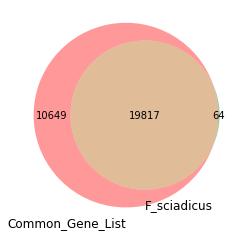

22642


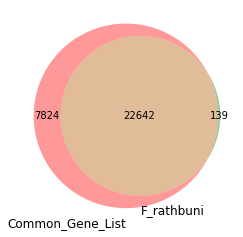

20204


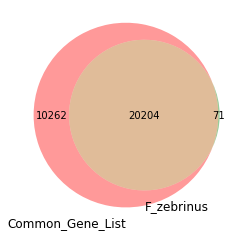

23910


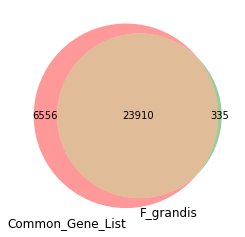

22150


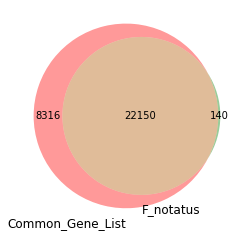

18080


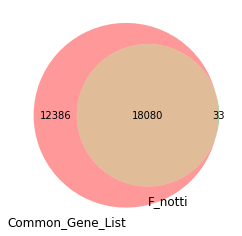

20327


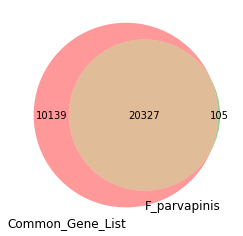

21767


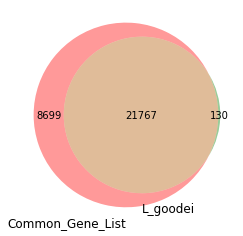

21376


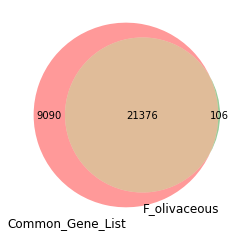

22028


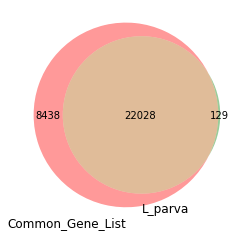

22741


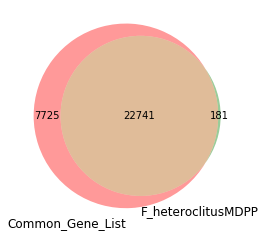

21672


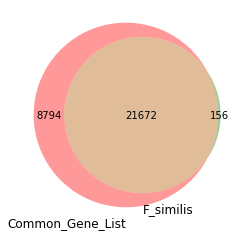

21358


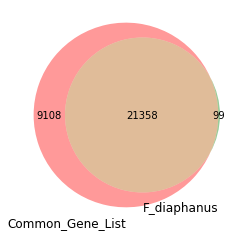

22103


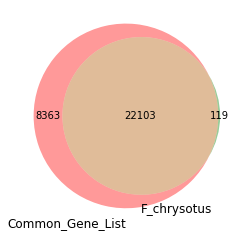

21627


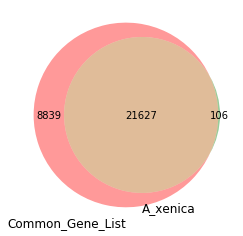

22115


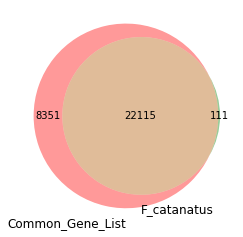

22643


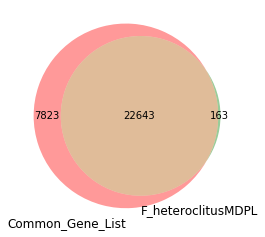

In [30]:
for genes_file in counts_matrices:
    if genes_file != ".DS_Store":
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Evigene'})
        species_genes = table['Evigene'].tolist()
        a = set(species_genes)
        b = set(gene_list_common_intersect)
        species_list = list(a & b)
        print(len(species_list))
        venn2(subsets = (len(b)-len(a.intersection(b)), 
                 len(a)-len(b.intersection(a)), 
                 len(b.intersection(a))), set_labels = ('Common_Gene_List',species))
        plt.show()

In [31]:
species_counts = pd.DataFrame()
species_counts['Ensembl'] = ""  
for genes_file in counts_matrices:
    if genes_file.endswith(".csv"):
        species = genes_file.split("_")[0]+"_"+genes_file.split("_")[1]
        print("========")
        print(species)
        print("========")
        table = pd.read_csv(counts_dir+genes_file,sep="\t")
        table = table.rename(columns={'Unnamed: 0': 'Ensembl'})
        counts = table[table['Ensembl'].isin(gene_list_common)]
        cols = counts.columns.tolist()
        colnames = ['Ensembl']
        for i in cols:
            if i.startswith(species):
                colnames.append(i)
        counts = counts[colnames]
        species_counts = pd.merge(species_counts,counts,on='Ensembl',how='outer')
        print(species_counts.shape)

F_sciadicus
(19817, 5)
F_rathbuni
(24706, 14)
F_zebrinus
(25928, 18)
F_grandis
(27802, 27)
F_notatus
(28455, 36)
F_notti
(28691, 38)
F_parvapinis
(29009, 46)
L_goodei
(29265, 55)
F_olivaceous
(29459, 63)
L_parva
(29662, 72)
F_heteroclitusMDPP
(29931, 81)
F_similis
(30045, 90)
F_diaphanus
(30124, 96)
F_chrysotus
(30230, 104)
A_xenica
(30317, 113)
F_catanatus
(30392, 120)
F_heteroclitusMDPL
(30466, 129)


In [32]:
species_counts = species_counts.fillna(0)

In [33]:
species_counts.head()

,Ensembl,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,...,F_catanatus_transfer_2.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant
0,ENSFHEP00000000002,6.000,0.000,0.000,2.000,8.000,0.000,0.000,9.000,3.698,...,3.000,2.000,1.000,2.000,4.000,0.000,0.000,4.000,2.000,3.000
1,ENSFHEP00000000003,23042.789,9296.479,6792.885,11158.935,1.000,0.000,1.000,0.000,4.000,...,132.644,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,ENSFHEP00000000004,58592.512,27442.796,17888.633,34481.969,80441.383,79272.627,68693.367,95453.916,476482.602,...,823950.009,248399.742,111880.438,34949.434,158191.408,91375.713,163944.848,262544.284,251743.250,513208.652
3,ENSFHEP00000000005,50399.889,19454.998,15391.000,30233.000,57591.304,58759.844,47638.353,66862.154,311102.702,...,208.858,4436.291,834.528,295.038,2729.824,783.143,997.453,3593.175,2777.505,7129.237
4,ENSFHEP00000000007,37691.752,12083.999,8985.000,17980.999,11.208,0.000,2.418,40.000,4.000,...,10.506,84.000,35.000,27.000,0.000,5.000,27.000,0.000,0.000,4.000


In [34]:
species_counts.shape

(30466, 129)

In [35]:
species_filt = species_counts[(species_counts.iloc[:,1:] > 5).any(1)]

In [36]:
species_filt.shape

(30466, 129)

In [37]:
species_counts.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/Ensembl_species_counts.csv",index=False,index_label=None)

# Design rows

In [38]:
cols = species_counts.columns.tolist()

In [39]:
print(cols)

['Ensembl', 'F_sciadicus_BW_1.quant', 'F_sciadicus_FW_1.quant', 'F_sciadicus_FW_2.quant', 'F_sciadicus_transfer_1.quant', 'F_rathbuni_BW_1.quant', 'F_rathbuni_BW_2.quant', 'F_rathbuni_BW_3.quant', 'F_rathbuni_FW_1.quant', 'F_rathbuni_FW_2.quant', 'F_rathbuni_FW_3.quant', 'F_rathbuni_transfer_1.quant', 'F_rathbuni_transfer_2.quant', 'F_rathbuni_transfer_3.quant', 'F_zebrinus_BW_1.quant', 'F_zebrinus_BW_2.quant', 'F_zebrinus_FW_1.quant', 'F_zebrinus_FW_2.quant', 'F_grandis_BW_1.quant', 'F_grandis_BW_2.quant', 'F_grandis_BW_3.quant', 'F_grandis_FW_1.quant', 'F_grandis_FW_2.quant', 'F_grandis_FW_3.quant', 'F_grandis_transfer_1.quant', 'F_grandis_transfer_2.quant', 'F_grandis_transfer_3.quant', 'F_notatus_BW_1.quant', 'F_notatus_BW_2.quant', 'F_notatus_BW_3.quant', 'F_notatus_FW_1.quant', 'F_notatus_FW_2.quant', 'F_notatus_FW_3.quant', 'F_notatus_transfer_1.quant', 'F_notatus_transfer_2.quant', 'F_notatus_transfer_3.quant', 'F_notti_FW_1.quant', 'F_notti_FW_2.quant', 'F_parvapinis_BW_1.quan

In [42]:
clade_design = {"A_xenica":"Clade3","F_catanatus":"Clade1","F_chrysotus":"Clade3",
 "F_diaphanus":"Clade1","F_grandis":"Clade1","F_heteroclitusMDPL":"Clade1",
 "F_heteroclitusMDPP":"Clade1","F_notatus":"Clade3","F_notti":"Clade3",
 "F_olivaceous":"Clade3","F_parvapinis":"Clade2","F_rathbuni":"Clade1",
 "F_sciadicus":"Clade3","F_similis":"Clade1","F_zebrinus":"Clade3",
 "L_goodei":"Clade2","L_parva":"Clade2"}
combined_design = {"A_xenica":"M_Clade3","F_catanatus":"FW_Clade1","F_chrysotus":"M_Clade3",
 "F_diaphanus":"M_Clade1","F_grandis":"M_Clade1","F_heteroclitusMDPL":"M_Clade1",
 "F_heteroclitusMDPP":"M_Clade1","F_notatus":"FW_Clade3","F_notti":"FW_Clade3",
 "F_olivaceous":"FW_Clade3","F_parvapinis":"M_Clade2","F_rathbuni":"FW_Clade1",
 "F_sciadicus":"FW_Clade3","F_similis":"M_Clade1","F_zebrinus":"M_Clade3",
 "L_goodei":"FW_Clade2","L_parva":"M_Clade2"}
phys_design = {"A_xenica":"M","F_catanatus":"FW","F_chrysotus":"M",
 "F_diaphanus":"M","F_grandis":"M","F_heteroclitusMDPL":"M",
 "F_heteroclitusMDPP":"M","F_notatus":"FW","F_notti":"FW",
 "F_olivaceous":"FW","F_parvapinis":"M","F_rathbuni":"FW",
 "F_sciadicus":"FW","F_similis":"M","F_zebrinus":"M",
 "L_goodei":"FW","L_parva":"M"}

In [43]:
species_list = ['Empty']
physiology_list = ['Empty']
clade_list = ['Empty']
combined_list = ['Empty']
condition_list = ['Empty']
for col in cols:
    if col != "Ensembl":
        species = col.split("_")[0]+"_"+col.split("_")[1]
        condition = col.split("_")[2]
        if condition == "BW":
            condition = "15_ppt"
        if condition == "FW":
            condition = "0.2_ppt"
        condition_list.append(condition)
        species_list.append(species)
        physiology = phys_design[species]
        physiology_list.append(physiology)
        clade = clade_design[species]
        clade_list.append(clade)
        design = combined_design[species]
        combined_list.append(design)
print(len(species_list))
print(len(physiology_list))
print(len(clade_list))
print(len(combined_list))
print(len(condition_list))

129
129
129
129
129


In [44]:
species_counts.columns

Index(['Ensembl', 'F_sciadicus_BW_1.quant', 'F_sciadicus_FW_1.quant',
       'F_sciadicus_FW_2.quant', 'F_sciadicus_transfer_1.quant',
       'F_rathbuni_BW_1.quant', 'F_rathbuni_BW_2.quant',
       'F_rathbuni_BW_3.quant', 'F_rathbuni_FW_1.quant',
       'F_rathbuni_FW_2.quant',
       ...
       'F_catanatus_transfer_2.quant', 'F_heteroclitusMDPL_BW_1.quant',
       'F_heteroclitusMDPL_BW_2.quant', 'F_heteroclitusMDPL_BW_3.quant',
       'F_heteroclitusMDPL_FW_1.quant', 'F_heteroclitusMDPL_FW_2.quant',
       'F_heteroclitusMDPL_FW_3.quant', 'F_heteroclitusMDPL_transfer_1.quant',
       'F_heteroclitusMDPL_transfer_2.quant',
       'F_heteroclitusMDPL_transfer_3.quant'],
      dtype='object', length=129)

In [45]:
species_counts.shape

(30466, 129)

In [46]:
df = pd.DataFrame([species_list],columns=species_counts.columns)
df2 = pd.DataFrame([physiology_list],columns=species_counts.columns)
df3 = pd.DataFrame([clade_list],columns=species_counts.columns)
df4 = pd.DataFrame([combined_list],columns=species_counts.columns)
df5 = pd.DataFrame([condition_list],columns=species_counts.columns)
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#df.head()
species_counts_real = species_counts.append(df)
species_counts_real = species_counts_real.append(df2)
species_counts_real = species_counts_real.append(df3)
species_counts_real = species_counts_real.append(df4)
species_counts_real = species_counts_real.append(df5)
print(species_counts_real.shape)

(1, 129)
(1, 129)
(1, 129)
(1, 129)
(1, 129)
(30471, 129)


In [47]:
pd.set_option('display.max_columns',500)
species_counts_real.tail(5)

,Ensembl,F_sciadicus_BW_1.quant,F_sciadicus_FW_1.quant,F_sciadicus_FW_2.quant,F_sciadicus_transfer_1.quant,F_rathbuni_BW_1.quant,F_rathbuni_BW_2.quant,F_rathbuni_BW_3.quant,F_rathbuni_FW_1.quant,F_rathbuni_FW_2.quant,F_rathbuni_FW_3.quant,F_rathbuni_transfer_1.quant,F_rathbuni_transfer_2.quant,F_rathbuni_transfer_3.quant,F_zebrinus_BW_1.quant,F_zebrinus_BW_2.quant,F_zebrinus_FW_1.quant,F_zebrinus_FW_2.quant,F_grandis_BW_1.quant,F_grandis_BW_2.quant,F_grandis_BW_3.quant,F_grandis_FW_1.quant,F_grandis_FW_2.quant,F_grandis_FW_3.quant,F_grandis_transfer_1.quant,F_grandis_transfer_2.quant,F_grandis_transfer_3.quant,F_notatus_BW_1.quant,F_notatus_BW_2.quant,F_notatus_BW_3.quant,F_notatus_FW_1.quant,F_notatus_FW_2.quant,F_notatus_FW_3.quant,F_notatus_transfer_1.quant,F_notatus_transfer_2.quant,F_notatus_transfer_3.quant,F_notti_FW_1.quant,F_notti_FW_2.quant,F_parvapinis_BW_1.quant,F_parvapinis_BW_2.quant,F_parvapinis_BW_3.quant,F_parvapinis_FW_1.quant,F_parvapinis_FW_2.quant,F_parvapinis_FW_3.quant,F_parvapinis_transfer_1.quant,F_parvapinis_transfer_2.quant,L_goodei_BW_1.quant,L_goodei_BW_2.quant,L_goodei_BW_3.quant,L_goodei_FW_1.quant,L_goodei_FW_2.quant,L_goodei_FW_3.quant,L_goodei_transfer_1.quant,L_goodei_transfer_2.quant,L_goodei_transfer_3.quant,F_olivaceous_BW_1.quant,F_olivaceous_BW_2.quant,F_olivaceous_BW_3.quant,F_olivaceous_FW_1.quant,F_olivaceous_FW_2.quant,F_olivaceous_FW_3.quant,F_olivaceous_transfer_1.quant,F_olivaceous_transfer_2.quant,L_parva_BW_1.quant,L_parva_BW_2.quant,L_parva_BW_3.quant,L_parva_FW_1.quant,L_parva_FW_2.quant,L_parva_FW_3.quant,L_parva_transfer_1.quant,L_parva_transfer_2.quant,L_parva_transfer_3.quant,F_heteroclitusMDPP_BW_1.quant,F_heteroclitusMDPP_BW_2.quant,F_heteroclitusMDPP_BW_3.quant,F_heteroclitusMDPP_FW_1.quant,F_heteroclitusMDPP_FW_2.quant,F_heteroclitusMDPP_FW_3.quant,F_heteroclitusMDPP_transfer_1.quant,F_heteroclitusMDPP_transfer_2.quant,F_heteroclitusMDPP_transfer_3.quant,F_similis_BW_1.quant,F_similis_BW_2.quant,F_similis_BW_3.quant,F_similis_FW_1.quant,F_similis_FW_2.quant,F_similis_FW_3.quant,F_similis_transfer_1.quant,F_similis_transfer_2.quant,F_similis_transfer_3.quant,F_diaphanus_BW_1.quant,F_diaphanus_BW_2.quant,F_diaphanus_FW_2.quant,F_diaphanus_FW_3.quant,F_diaphanus_transfer_1.quant,F_diaphanus_transfer_2.quant,F_chrysotus_BW_1.quant,F_chrysotus_BW_2.quant,F_chrysotus_BW_3.quant,F_chrysotus_FW_1.quant,F_chrysotus_FW_2.quant,F_chrysotus_FW_3.quant,F_chrysotus_transfer_1.quant,F_chrysotus_transfer_2.quant,A_xenica_BW_1.quant,A_xenica_BW_2.quant,A_xenica_BW_3.quant,A_xenica_FW_1.quant,A_xenica_FW_2.quant,A_xenica_FW_3.quant,A_xenica_transfer_1.quant,A_xenica_transfer_2.quant,A_xenica_transfer_3.quant,F_catanatus_BW_1.quant,F_catanatus_BW_2.quant,F_catanatus_BW_3.quant,F_catanatus_FW_1.quant,F_catanatus_FW_2.quant,F_catanatus_transfer_1.quant,F_catanatus_transfer_2.quant,F_heteroclitusMDPL_BW_1.quant,F_heteroclitusMDPL_BW_2.quant,F_heteroclitusMDPL_BW_3.quant,F_heteroclitusMDPL_FW_1.quant,F_heteroclitusMDPL_FW_2.quant,F_heteroclitusMDPL_FW_3.quant,F_heteroclitusMDPL_transfer_1.quant,F_heteroclitusMDPL_transfer_2.quant,F_heteroclitusMDPL_transfer_3.quant
0,Empty,F_sciadicus,F_sciadicus,F_sciadicus,F_sciadicus,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_rathbuni,F_zebrinus,F_zebrinus,F_zebrinus,F_zebrinus,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_grandis,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notatus,F_notti,F_notti,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,F_parvapinis,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,L_goodei,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,F_olivaceous,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,L_parva,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heteroclitusMDPP,F_heterocl

In [48]:
species_counts_real.to_csv("/Users/johnsolk/Documents/UCDavis/Whitehead/kfish_salmon/Ensembl_species_counts_designfactors.csv")

In [49]:
species_counts_real.shape

(30471, 129)